# Airbnb Reservation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the database
dados = pd.read_csv("AB_NYC_2019.csv")

# Selecting specific columns
dados = dados[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights']]

# Viewing the first DataFrame records
print(dados.head(6))


C:\Users\bhava\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   
5           Manhattan   Murray Hill  40.74767  -73.97500  Entire home/apt   

   price  minimum_nights  
0    149               1  
1    225               1  
2    150               3  
3     89               1  
4     80              10  
5    200               3  


In [2]:
# Displaying overview of the DataFrame
print(dados.info())

# Displaying summary statistics for numeric columns
print(dados.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  object 
 1   neighbourhood        48895 non-null  object 
 2   latitude             48895 non-null  float64
 3   longitude            48895 non-null  float64
 4   room_type            48895 non-null  object 
 5   price                48895 non-null  int64  
 6   minimum_nights       48895 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.6+ MB
None
           latitude     longitude         price  minimum_nights
count  48895.000000  48895.000000  48895.000000    48895.000000
mean      40.728949    -73.952170    152.720687        7.029962
std        0.054530      0.046157    240.154170       20.510550
min       40.499790    -74.244420      0.000000        1.000000
25%       40.690100    -73.983070     69.000000        

In [3]:
neighbourhood_group_unique = dados["neighbourhood_group"].unique()
print(neighbourhood_group_unique)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [4]:
neighbourhood_unique = dados["neighbourhood"].unique()
print(neighbourhood_unique)

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [5]:
room_type_unique = dados["room_type"].unique()
print(room_type_unique)

['Private room' 'Entire home/apt' 'Shared room']


In [6]:
minimum_nights_unique = dados["minimum_nights"].unique()
print(minimum_nights_unique)

[   1    3   10   45    2    5    4   90    7   14   60   29   30  180
    9   31    6   15    8   26   28  200   50   17   21   11   25   13
   35   27   18   20   40   44   65   55  120  365  122   19  240   88
  115  150  370   16   80  181  265  300   59  185  360   56   12   70
   39   24   32 1000  110  270   22   75  250   62   23 1250  364   74
  198  100  500   43   91  480   53   99  160   47  999  186  366   68
   93   87  183  299  175   98  133  354   42   33   37  225  400  105
  184  153  134  222   58  210  275  182  114   85   36]


In [7]:
price_min = dados["price"].min()
price_max = dados["price"].max()

result = "Price Minimum: {} | Price Maximum: {}".format(price_min, price_max)
print(result)

Price Minimum: 0 | Price Maximum: 10000


In [8]:
minimum_longitude = dados["longitude"].min()
maximum_latitude = dados["longitude"].max()

result = "Minimum Longitude: {} | Maximum Latitude: {}".format(minimum_longitude, maximum_latitude)
print(result)

Minimum Longitude: -74.24442 | Maximum Latitude: -73.71299


In [9]:
# Calculating frequency and percentage
frequency = dados["neighbourhood_group"].value_counts()
percent = (dados["neighbourhood_group"].value_counts(normalize=True) * 100).round(2)

# Combining frequency and percentage into a DataFrame
freq_location = pd.concat([frequency, percent], axis=1)
freq_location.columns = ['Frequency', 'Percent']

# Sorting by frequency
freq_location = freq_location.sort_values(by='Frequency')

print(freq_location)

               Frequency  Percent
Staten Island        373     0.76
Bronx               1091     2.23
Queens              5666    11.59
Brooklyn           20104    41.12
Manhattan          21661    44.30


In [10]:
# Calculating frequency and percentage
frequency = dados["neighbourhood"].value_counts()
percent = (dados["neighbourhood"].value_counts(normalize=True) * 100).round(2)

# Combining frequency and percentage into a DataFrame
freq_area = pd.concat([frequency, percent], axis=1)
freq_area.columns = ['Frequency', 'Percent']

# Sorting by frequency
freq_area = freq_area.sort_values(by='Frequency')

print(freq_area)


                    Frequency  Percent
Willowbrook                 1     0.00
Woodrow                     1     0.00
Fort Wadsworth              1     0.00
Rossville                   1     0.00
New Dorp                    1     0.00
...                       ...      ...
Upper West Side          1971     4.03
Bushwick                 2465     5.04
Harlem                   2658     5.44
Bedford-Stuyvesant       3714     7.60
Williamsburg             3920     8.02

[221 rows x 2 columns]


In [11]:
# Calculating frequency and percentage
frequency = dados["room_type"].value_counts()
percent = (dados["room_type"].value_counts(normalize=True) * 100).round(2)

# Combining frequency and percentage into a DataFrame
freq_type = pd.concat([frequency, percent], axis=1)
freq_type.columns = ['Frequency', 'Percent']

# Sorting by frequency
freq_type = freq_type.sort_values(by='Frequency')

print(freq_type)

                 Frequency  Percent
Shared room           1160     2.37
Private room         22326    45.66
Entire home/apt      25409    51.97


In [12]:
# Calculate the number of bins using Sturges' formula
n = len(dados)
k = round(1 + ((10/3) * np.log10(n)))

# Define the labels for the bins
labels = ['      1  |—|  73,470', ' 73,470   —|  146,940', ' 146,940  —|  220,411', ' 220,411  —|  293,881', ' 293,881  —|  367,352', ' 367,352  —|  440,822', ' 440,822  —| 514,293', ' 514,293  —| 587,764', ' 587,764  —| 661,234', ' 661,234  —| 734,705', ' 734,705  —| 808,175', ' 808,175  —| 881,646', ' 881,646  —| 955,117', ' 955,117  —| 1028,587', ' 1028,587 —| 1102,058', ' 1102,058 —| 1175,528', ' 1175,528 —| 1250']

# Bin the data and calculate frequency and percentage
dados['freq_nights'] = pd.cut(dados['minimum_nights'], bins=k, labels=labels, include_lowest=True)
freq_nights = dados['freq_nights'].value_counts().reset_index()
freq_nights.columns = ['Frequency', 'Percent']
freq_nights['Percent'] = (freq_nights['Percent'] / len(dados)) * 100

print(freq_nights)

                Frequency    Percent
0          1  |—|  73,470  99.349627
1    73,470   —|  146,940   0.376317
2    146,940  —|  220,411   0.137028
3    293,881  —|  367,352   0.089989
4    220,411  —|  293,881   0.020452
5     440,822  —| 514,293   0.012271
6    955,117  —| 1028,587   0.008181
7    367,352  —|  440,822   0.004090
8        1175,528 —| 1250   0.002045
9     661,234  —| 734,705   0.000000
10    734,705  —| 808,175   0.000000
11    808,175  —| 881,646   0.000000
12    881,646  —| 955,117   0.000000
13    514,293  —| 587,764   0.000000
14   1028,587 —| 1102,058   0.000000
15   1102,058 —| 1175,528   0.000000
16    587,764  —| 661,234   0.000000


In [13]:
# Define the labels for the bins
labels = [' 0 |—|  58,823', '  58,823  —|  117,647', ' 117,647  —|  176,470', ' 176,470  —|  235,294', ' 235,294  —|  294,117', ' 294,117  —|  352,941', ' 352,941  —|  411,764', ' 411,764  —|  470,588', ' 470,588  —|  529,411', ' 529,411  —|  588,235', ' 588,235  —|  647,058', ' 647,058  —|  705,882', ' 705,882  —|  764,705', ' 764,705  —|  823,529', ' 823,529  —|  882,352', ' 882,352  —|  941,176', ' 941,176  —|  10 000']

# Bin the data and calculate frequency and percentage
dados['freq_price'] = pd.cut(dados['price'], bins=k, labels=labels, include_lowest=True)
freq_price = dados['freq_price'].value_counts().reset_index()
freq_price.columns = ['Frequency', 'Percent']
freq_price['Percent'] = (freq_price['Percent'] / len(dados)) * 100

print(freq_price)

                Frequency    Percent
0           0 |—|  58,823  98.157276
1     58,823  —|  117,647   1.413232
2    117,647  —|  176,470   0.182023
3    176,470  —|  235,294   0.087944
4    235,294  —|  294,117   0.042949
5    294,117  —|  352,941   0.032723
6    352,941  —|  411,764   0.020452
7    470,588  —|  529,411   0.016362
8     941,176  —|  10 000   0.012271
9    411,764  —|  470,588   0.010226
10   647,058  —|  705,882   0.008181
11   588,235  —|  647,058   0.006136
12   705,882  —|  764,705   0.004090
13   764,705  —|  823,529   0.004090
14   823,529  —|  882,352   0.002045
15   529,411  —|  588,235   0.000000
16   882,352  —|  941,176   0.000000


Of all bookings made on airbnb a total of 47 994(98.15%) are priced less than or equal to 58.823 dollars and 691(1.41%) are between 58,823 and 117,647 dollars.

I will not create frequency distribution tables for the latitude and longitude attributes, as this would not make much sense for our analysis.

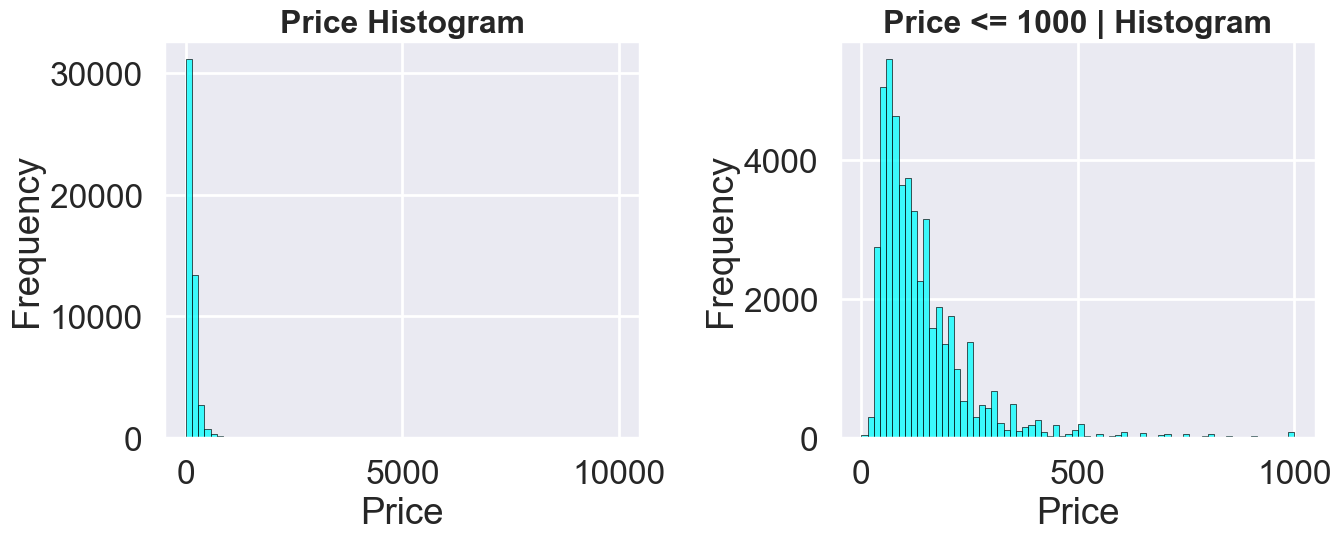

In [14]:
sns.set_theme()
sns.set_context("poster", font_scale=1.1)
theme = {
    'plot.background': sns.axes_style()['axes.facecolor'],
    'plot.title': {'size': 23, 'weight': 'bold', 'ha': 'center'},
    'axes.labelsize': 19,
    'axes.titlesize': 19,
    'legend.position': 'none'
}

# Define the data
dados = pd.read_csv("AB_NYC_2019.csv")

# Plot the original histogram
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=dados, x='price', bins=70, color='cyan', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram', **theme['plot.title'])

# Plot the histogram for prices <= 1000
df = dados[dados['price'] <= 1000]
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='price', bins=70, color='cyan', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price <= 1000 | Histogram', **theme['plot.title'])

plt.tight_layout()
plt.show()


As we have seen in the frequency distribution table of the price variable, but now using a histogram, we can see how the prices are distributed, we notice that the largest concentration of values is below 200 dollars, and as we have seen in the table we have whereas a total of 47 994 (98.15%) of reserves are between 0 and 58,823 dollars.

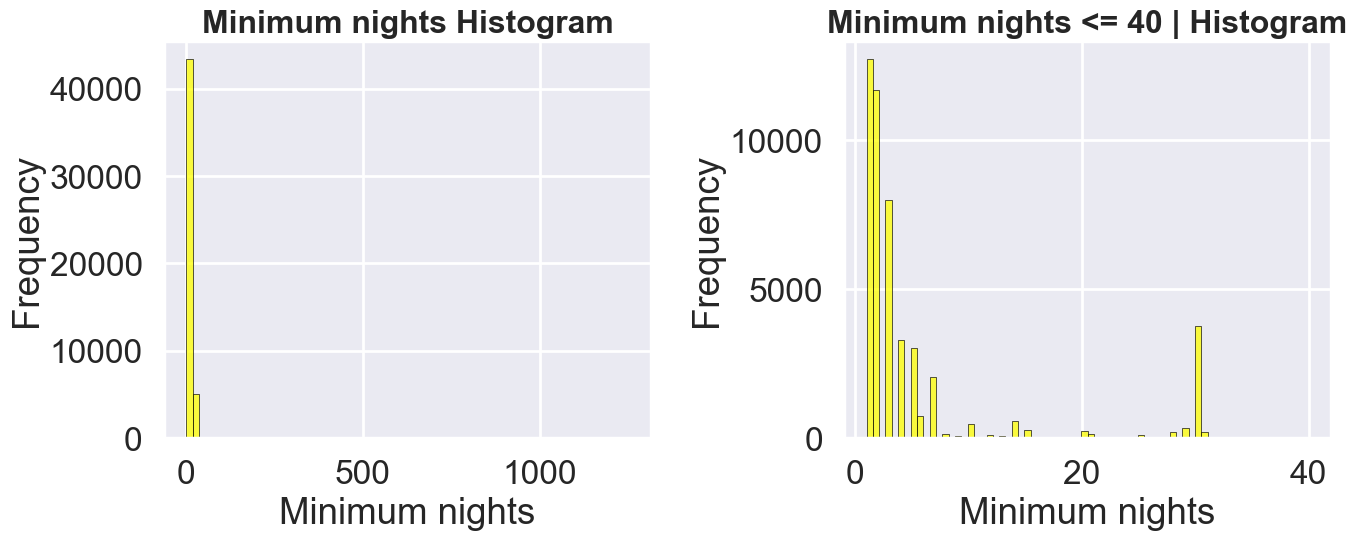

In [15]:
# Plot the original histogram
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=dados, x='minimum_nights', bins=70, color='yellow', edgecolor='black')
plt.xlabel('Minimum nights')
plt.ylabel('Frequency')
plt.title('Minimum nights Histogram', **theme['plot.title'])

# Plot the histogram for minimum nights <= 40
df = dados[dados['minimum_nights'] <= 40]
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='minimum_nights', bins=70, color='yellow', edgecolor='black')
plt.xlabel('Minimum nights')
plt.ylabel('Frequency')
plt.title('Minimum nights <= 40 | Histogram', **theme['plot.title'])

plt.tight_layout()
plt.show()

In the same way as in the frequency table, but now viewing through a histogram, we can see that the minimum number of nights for all reservations made on airbnb are concentrated below 10 with a small peak at 30.Recapping an important information from the frequency table of the variable minimum_nights , we have to: we can see that 48,577(99.34%) of the reserves made on airbnb are for a minimum number of nights between 1 to 73,47.

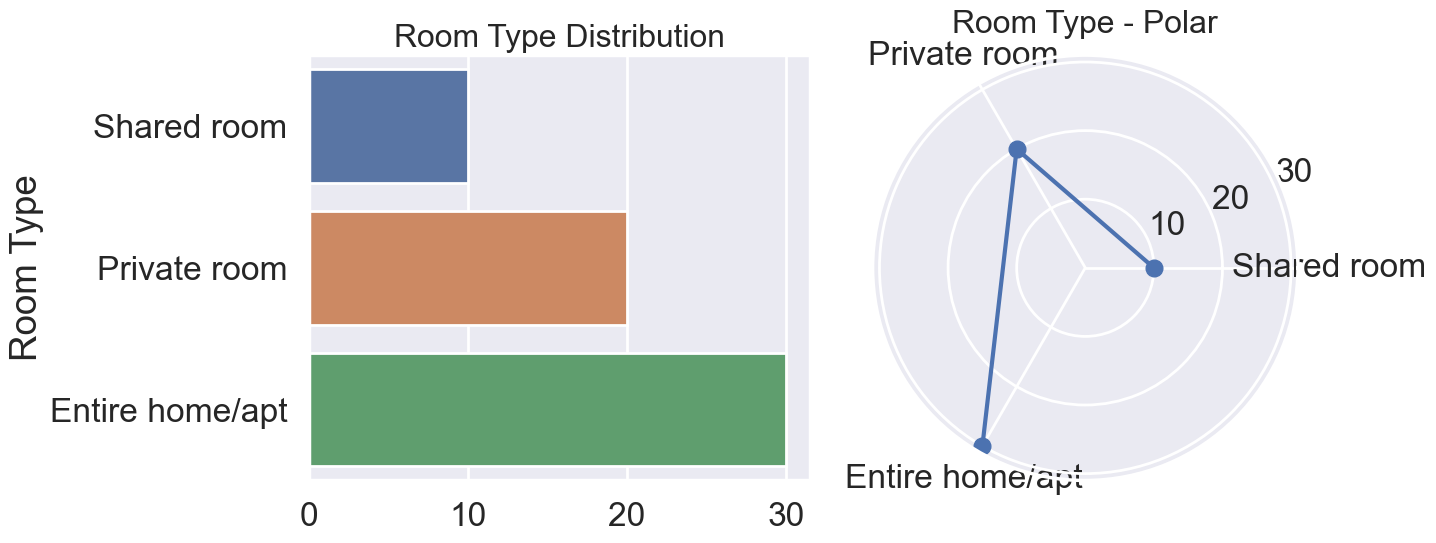

In [16]:
# Define the theme for the first plot
theme = {
    'plot.background': '#EEE8AA',
    'plot.title': {'size': 23, 'loc': 'center'},
    'axes.labelsize': 19,
    'axes.titlesize': 23,
}

# Define the theme for the second plot
theme1 = {
    'plot.background': '#EEE8AA',
    'plot.title': {'size': 23, 'loc': 'center'},
    'axes.labelsize': 12,
    'axes.titlesize': 12,
}

# Define the data
room_type_counts = {'Shared room': 10, 'Private room': 20, 'Entire home/apt': 30}

# Plot the first bar plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(room_type_counts.values()), y=list(room_type_counts.keys()), palette='deep')
plt.ylabel('Room Type')
plt.title('Room Type Distribution', **theme['plot.title'])

# Plot the second polar plot
plt.subplot(1, 2, 2, polar=True)  # Set polar projection here
theta = np.linspace(0, 2 * np.pi, len(room_type_counts), endpoint=False).tolist()
plt.plot(theta, list(room_type_counts.values()), marker='o')  # Use plot instead of polar for compatibility
plt.title('Room Type - Polar', **theme1['plot.title'])
plt.xticks(theta, list(room_type_counts.keys()))

plt.tight_layout()
plt.show()

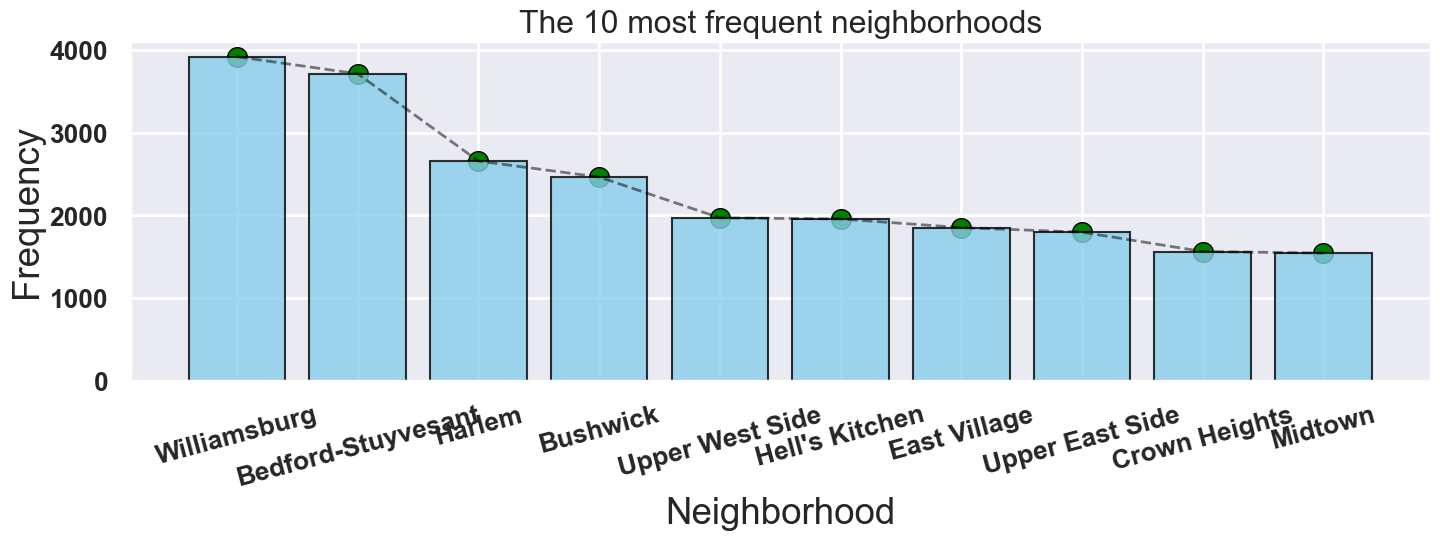

In [17]:
# Define the theme
theme = {
    'plot.title': {'size': 23, 'loc': 'center'},
    'axes.labelsize': 19,
    'axes.titlesize': 19,
    'legend.title_fontsize': 14,
}

# Get the 10 most frequent neighborhoods
most_frequent_neighborhoods = freq_area.sort_values(by='Frequency', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(15, 6))
sns.scatterplot(x=most_frequent_neighborhoods.index, y=most_frequent_neighborhoods['Frequency'], s=200, color='green', edgecolor='black', linewidth=1)
plt.plot(most_frequent_neighborhoods.index, most_frequent_neighborhoods['Frequency'], color='black', linestyle='--', linewidth=2, alpha=0.5)
plt.bar(most_frequent_neighborhoods.index, most_frequent_neighborhoods['Frequency'], alpha=0.8, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('The 10 most frequent neighborhoods', **theme['plot.title'])
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=15, fontsize=19, fontweight='bold')
plt.yticks(fontsize=19, fontweight='bold')

plt.tight_layout()
plt.show()


From many questions that arise from an analysis, here we can answer the following: Of all 221 neighborhoods, which is the most requested by customers for advertisements and accommodation reservations on the airbnb website?

The 10 most frequent neighbourhood

1) Williamsburg -> 3920(8.01%)
2) Bedford-Stuyvesant -> 3714(7.59%)
3) Harlem -> 2658(5.43%)
4) Bushwick -> 2465(5.04%)
5) Upper West Side -> 1971(4.03%)
6) Hell's Kitchen -> 1958(4.00%)
7) East Village -> 1853(3.78%)
8) Upper East Side -> 1798(3.67%)
9) Crown Heights -> 1564(3.19%)
10) Midtown -> 1545(3.15%)

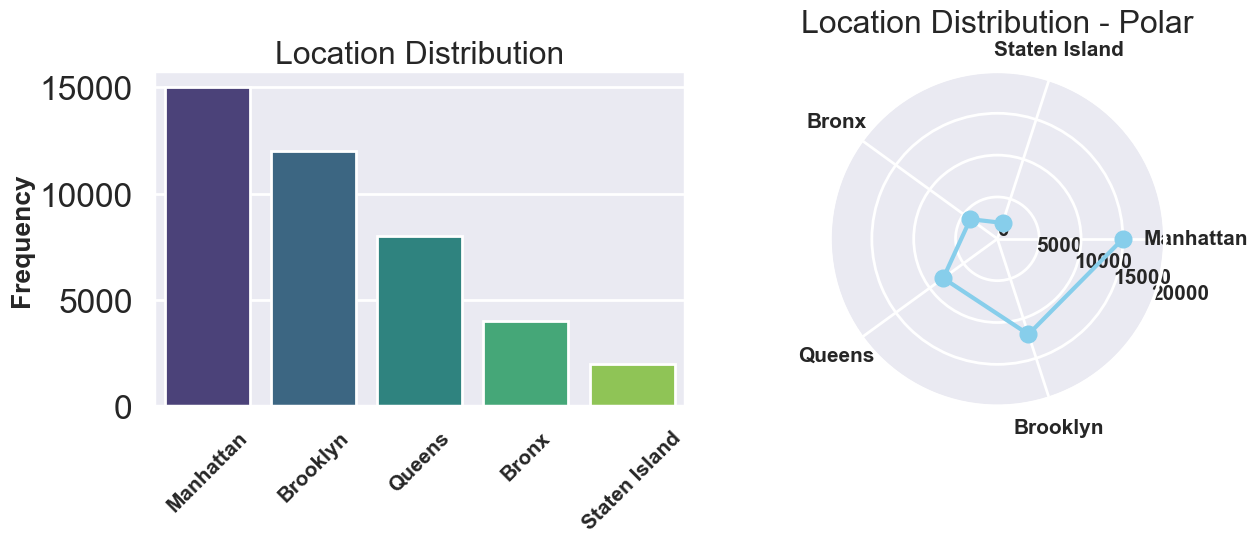

In [18]:
# Create a DataFrame for demonstration (replace with your actual data)
freq_location = pd.DataFrame({
    'Neighborhood': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'Frequency': [15000, 12000, 8000, 4000, 2000]  # Example frequency values
})

# Plotting the data
plt.figure(figsize=(14, 6))

# Vertical bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=freq_location, x='Neighborhood', y='Frequency', palette='viridis')
plt.title('Location Distribution', **theme['plot.title'])
plt.xlabel('')
plt.xticks(rotation=45, fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=19, fontweight='bold')

# Polar bar plot
plt.subplot(1, 2, 2, projection='polar')
theta = np.linspace(0, 2 * np.pi, len(freq_location), endpoint=False)
r = freq_location['Frequency']
plt.plot(theta, r, marker='o', color='skyblue')
plt.title('Location Distribution - Polar', **theme['plot.title'])
plt.xticks(theta, freq_location['Neighborhood'], fontsize=15, fontweight='bold')
plt.yticks(np.arange(0, 21000, 5000), fontsize=15, fontweight='bold')  # Set the radial axis range
plt.gca().set_theta_direction(-1)  # Adjust the direction of the polar plot

plt.tight_layout()
plt.show()

most frequent neighbourhood group

1° Manhattan -> 21661(44.30%)
2° Brooklyn -> 20104(41.11%)
3° Queens -> 5666(11.58%)
4° Bronx -> 1091(2.23%)
5° Staten Island -> 373(0.76%)

In [19]:
# Assuming 'dados' is your DataFrame
means = pd.DataFrame({
    'Mean': [dados['price'].mean(), dados['minimum_nights'].mean()]
}, index=['Price', 'Minimum nights'])

print(means)

                      Mean
Price           152.720687
Minimum nights    7.029962


In [20]:
# Assuming 'dados' is your DataFrame
medians = pd.DataFrame({
    'Median': [dados['price'].median(), dados['minimum_nights'].median()]
}, index=['Price', 'Minimum nights'])

print(medians)

                Median
Price            106.0
Minimum nights     3.0


In [21]:
# Assuming 'dados' is your DataFrame
modes = pd.DataFrame({
    'Mode': [dados['price'].mode()[0], dados['minimum_nights'].mode()[0]]
}, index=['Price', 'Minimum nights'])

print(modes)

                Mode
Price            100
Minimum nights     1


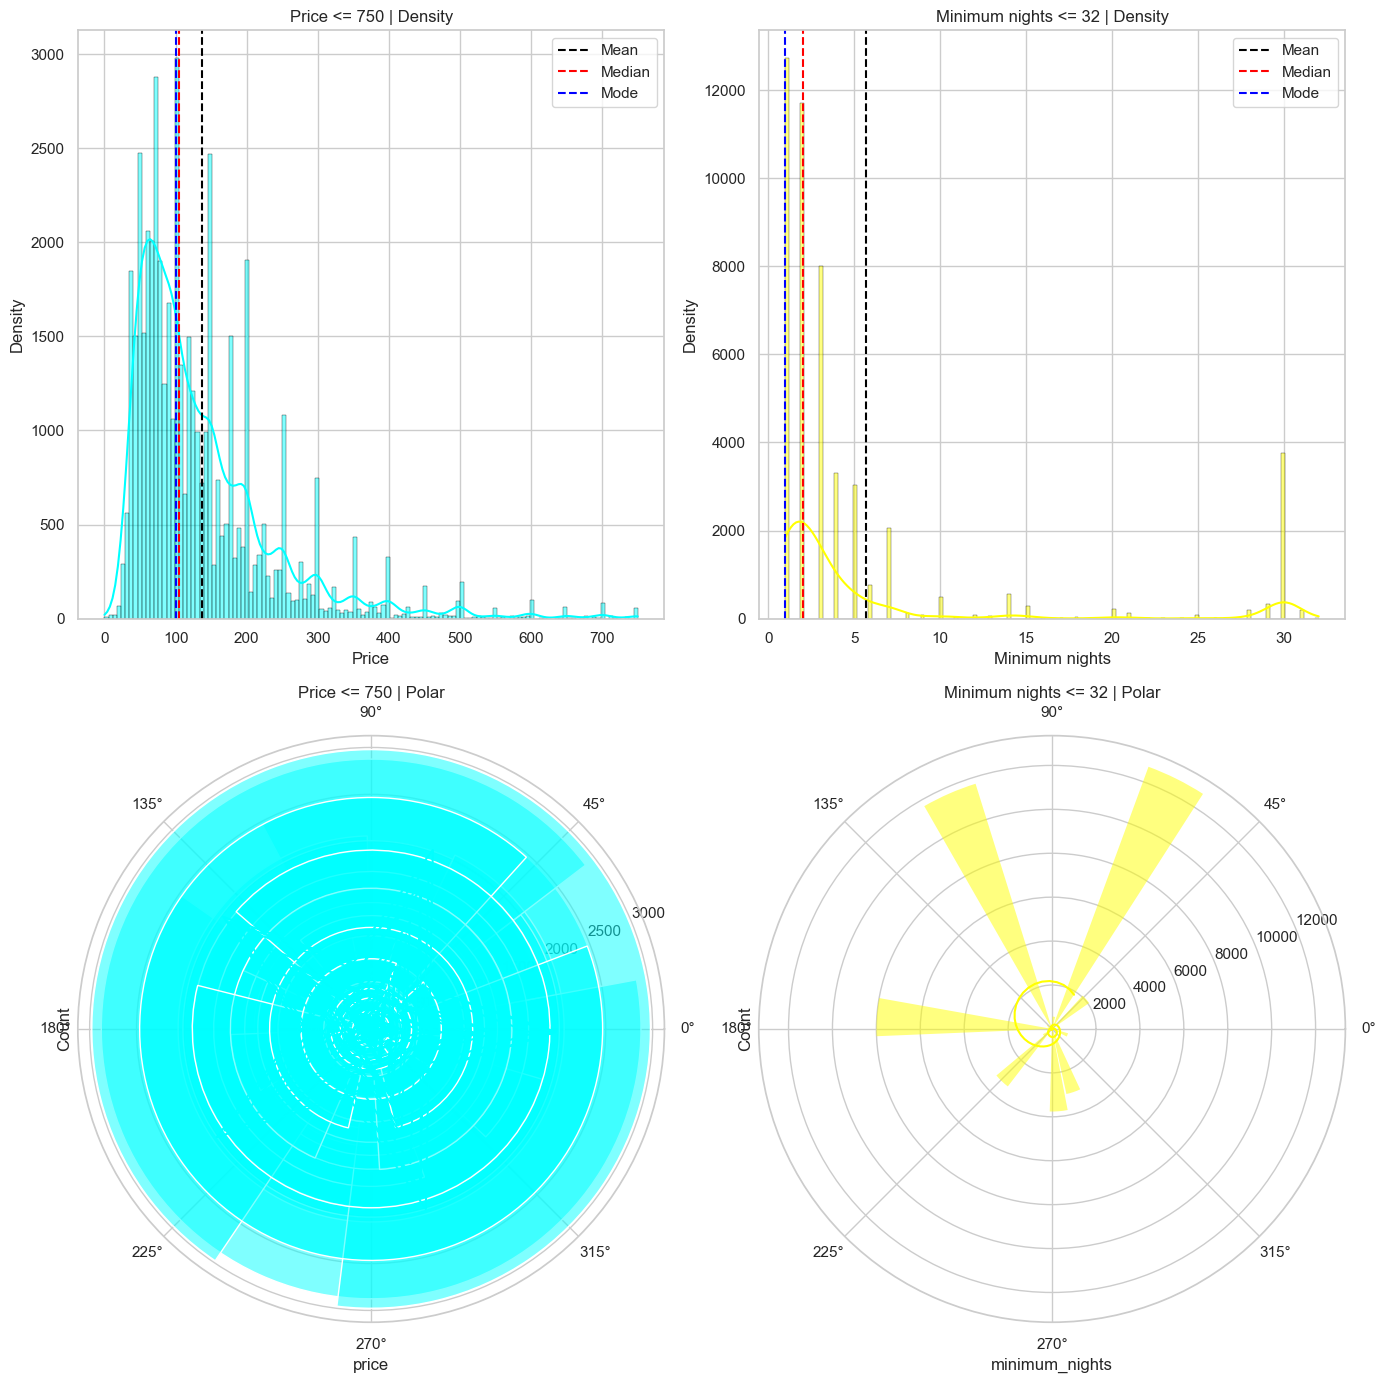

In [22]:
# Define a function to calculate mode
def mode(x):
    freq = x.value_counts()
    return freq.idxmax()

# Load the dataset
dados = pd.read_csv("AB_NYC_2019.csv")

# Filter data for price <= 750
df_price = dados[dados['price'] <= 750]
# Filter data for minimum_nights <= 32
df_minimum_nights = dados[dados['minimum_nights'] <= 32]

# Set theme for plots
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 14))

# Plot Density Plot for Price <= 750
plt.subplot(2, 2, 1)
sns.histplot(data=df_price, x='price', kde=True, color='cyan', edgecolor='black')
plt.axvline(df_price['price'].mean(), color='black', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(df_price['price'].median(), color='red', linestyle='dashed', linewidth=1.5, label='Median')
plt.axvline(mode(df_price['price']), color='blue', linestyle='dashed', linewidth=1.5, label='Mode')
plt.legend()
plt.title('Price <= 750 | Density')
plt.xlabel('Price')
plt.ylabel('Density')

# Plot Density Plot for Minimum Nights <= 32
plt.subplot(2, 2, 2)
sns.histplot(data=df_minimum_nights, x='minimum_nights', kde=True, color='yellow', edgecolor='black')
plt.axvline(df_minimum_nights['minimum_nights'].mean(), color='black', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(df_minimum_nights['minimum_nights'].median(), color='red', linestyle='dashed', linewidth=1.5, label='Median')
plt.axvline(mode(df_minimum_nights['minimum_nights']), color='blue', linestyle='dashed', linewidth=1.5, label='Mode')
plt.legend()
plt.title('Minimum nights <= 32 | Density')
plt.xlabel('Minimum nights')
plt.ylabel('Density')

# Plot Polar Plot for Price <= 750
plt.subplot(2, 2, 3, polar=True)
sns.histplot(data=df_price, x='price', kde=True, color='cyan')
plt.title('Price <= 750 | Polar')

# Plot Polar Plot for Minimum Nights <= 32
plt.subplot(2, 2, 4, polar=True)
sns.histplot(data=df_minimum_nights, x='minimum_nights', kde=True, color='yellow')
plt.title('Minimum nights <= 32 | Polar')

plt.tight_layout()
plt.show()

In [23]:
# Calculate quartiles for 'price' and 'minimum_nights'
price_quartiles = dados['price'].quantile([0.25, 0.5, 0.75])
minimum_nights_quartiles = dados['minimum_nights'].quantile([0.25, 0.5, 0.75])

# Create a DataFrame to display the quartiles
quartiles_df = pd.DataFrame({'Price': price_quartiles, 'Minimum Nights': minimum_nights_quartiles})
quartiles_df.index = ['25%', '50%', '75%']

print(quartiles_df)


     Price  Minimum Nights
25%   69.0             1.0
50%  106.0             3.0
75%  175.0             5.0


In [24]:
# Define deciles
deciles = np.arange(0.1, 1, 0.1)

# Calculate deciles for 'price' and 'minimum_nights'
price_deciles = dados['price'].quantile(deciles)
minimum_nights_deciles = dados['minimum_nights'].quantile(deciles)

# Create a DataFrame to display the deciles
deciles_df = pd.DataFrame({'Price': price_deciles, 'Minimum Nights': minimum_nights_deciles})
deciles_df.index = [f'{int(d * 10)}%' for d in deciles]

print(deciles_df)

    Price  Minimum Nights
1%   49.0             1.0
2%   60.0             1.0
3%   75.0             2.0
4%   90.0             2.0
5%  106.0             3.0
6%  130.0             3.0
7%  155.0             4.0
8%  200.0             6.0
9%  269.0            28.0


In [25]:
# Define percentiles
percentiles = np.arange(0.01, 1, 0.01)

# Calculate percentiles for 'price' and 'minimum_nights'
price_percentiles = dados['price'].quantile(percentiles)
minimum_nights_percentiles = dados['minimum_nights'].quantile(percentiles)

# Create a DataFrame to display the percentiles
percentiles_df = pd.DataFrame({'Price': price_percentiles, 'Minimum Nights': minimum_nights_percentiles})
percentiles_df.index = [f'{int(p * 100)}%' for p in percentiles]

print(percentiles_df)

     Price  Minimum Nights
1%    30.0             1.0
2%    35.0             1.0
3%    36.0             1.0
4%    39.0             1.0
5%    40.0             1.0
..     ...             ...
95%  355.0            30.0
96%  400.0            30.0
97%  450.0            30.0
98%  550.0            30.0
99%  799.0            45.0

[99 rows x 2 columns]


1)25.00% of bookings made on airbnb are of values equal to or less than 69 dollars and 1 minimum night.

2)50.00% of bookings made on airbnb are of values equal to or less than 106 dollars and 3 minimum nights.

3)75.00% of bookings made on airbnb are of values equal to or less than 175 dollars and 5 minimum nights.

4)99.00% of bookings made on airbnb are of values equal to or less than 799 dollars and 45 minimum nights, meaning only 1.0% of bookings are of values above 799 dollars with a maximum value of 10000 dollars and 1250 minimum nights.

We can see that the values above 99.00% of the attributes minimum_nights and price have very strange values, but I will not make any decision, as this is not the objective of this work. In order to have more information about these values and to make decisions, a more precise investigation is needed to verify if these values with the upper limit of 10000 dollars and 1250 minimum nights are indeed in fact outliers or not.

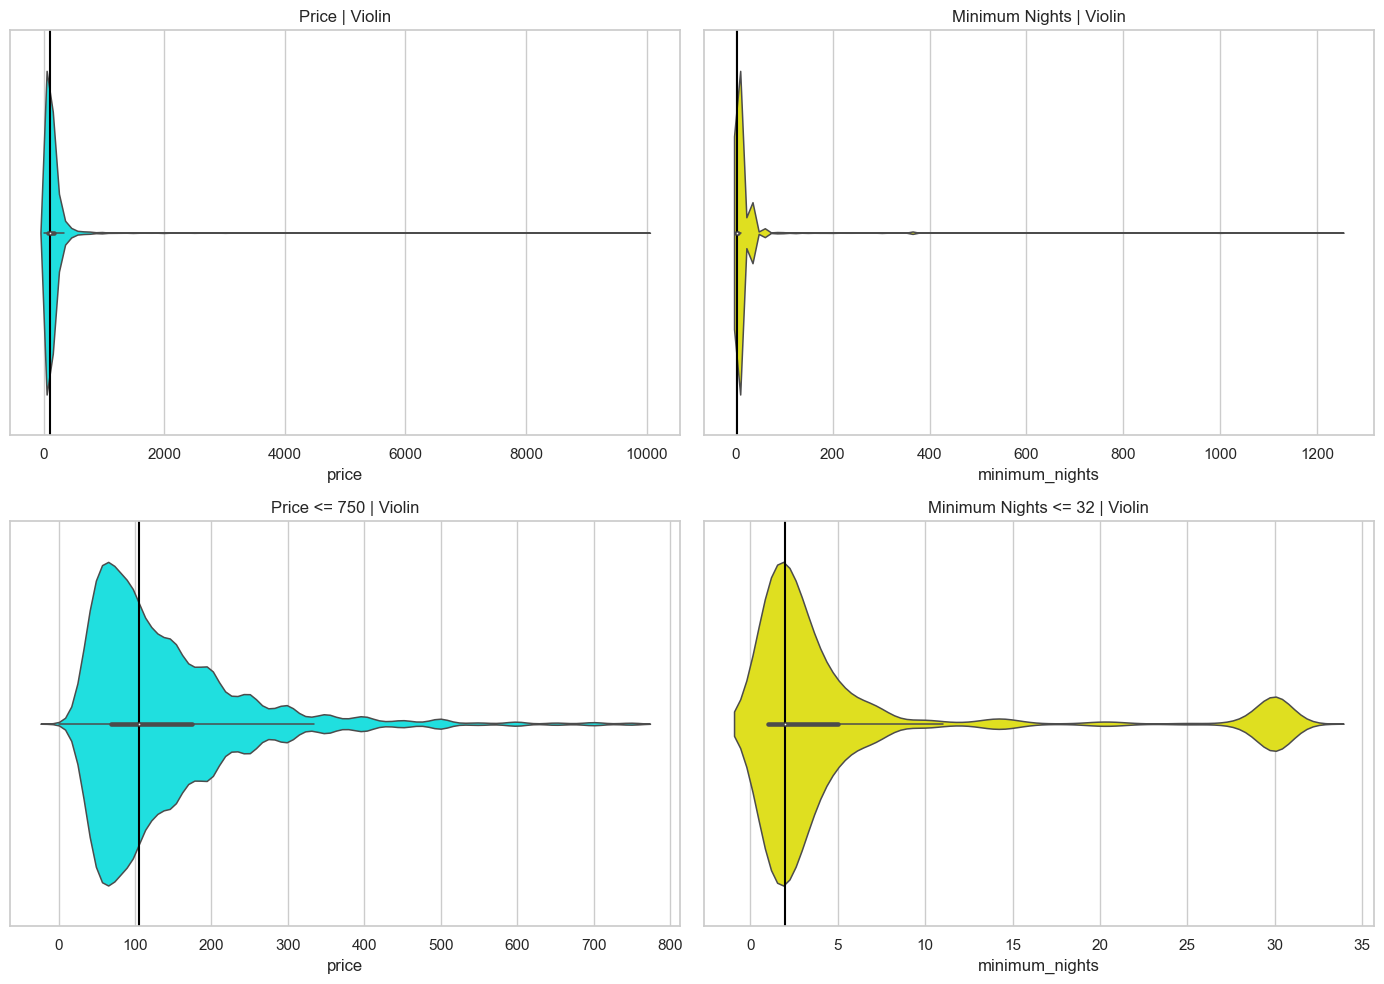

In [26]:
# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Price violin plot
sns.violinplot(ax=axs[0, 0], data=dados, x='price', color='cyan', linewidth=1.1)
axs[0, 0].axvline(x=np.median(dados['price']), linewidth=1.5, color='black')
axs[0, 0].set_title('Price | Violin')

# Plot Minimum Nights violin plot
sns.violinplot(ax=axs[0, 1], data=dados, x='minimum_nights', color='yellow', linewidth=1.1)
axs[0, 1].axvline(x=np.median(dados['minimum_nights']), linewidth=1.5, color='black')
axs[0, 1].set_title('Minimum Nights | Violin')

# Filter data for Price <= 750 and plot Price <= 750 violin plot
df_price = dados[dados['price'] <= 750]
sns.violinplot(ax=axs[1, 0], data=df_price, x='price', color='cyan', linewidth=1.1)
axs[1, 0].axvline(x=np.median(df_price['price']), linewidth=1.5, color='black')
axs[1, 0].set_title('Price <= 750 | Violin')

# Filter data for Minimum Nights <= 32 and plot Minimum Nights <= 32 violin plot
df_min_nights = dados[dados['minimum_nights'] <= 32]
sns.violinplot(ax=axs[1, 1], data=df_min_nights, x='minimum_nights', color='yellow', linewidth=1.1)
axs[1, 1].axvline(x=np.median(df_min_nights['minimum_nights']), linewidth=1.5, color='black')
axs[1, 1].set_title('Minimum Nights <= 32 | Violin')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

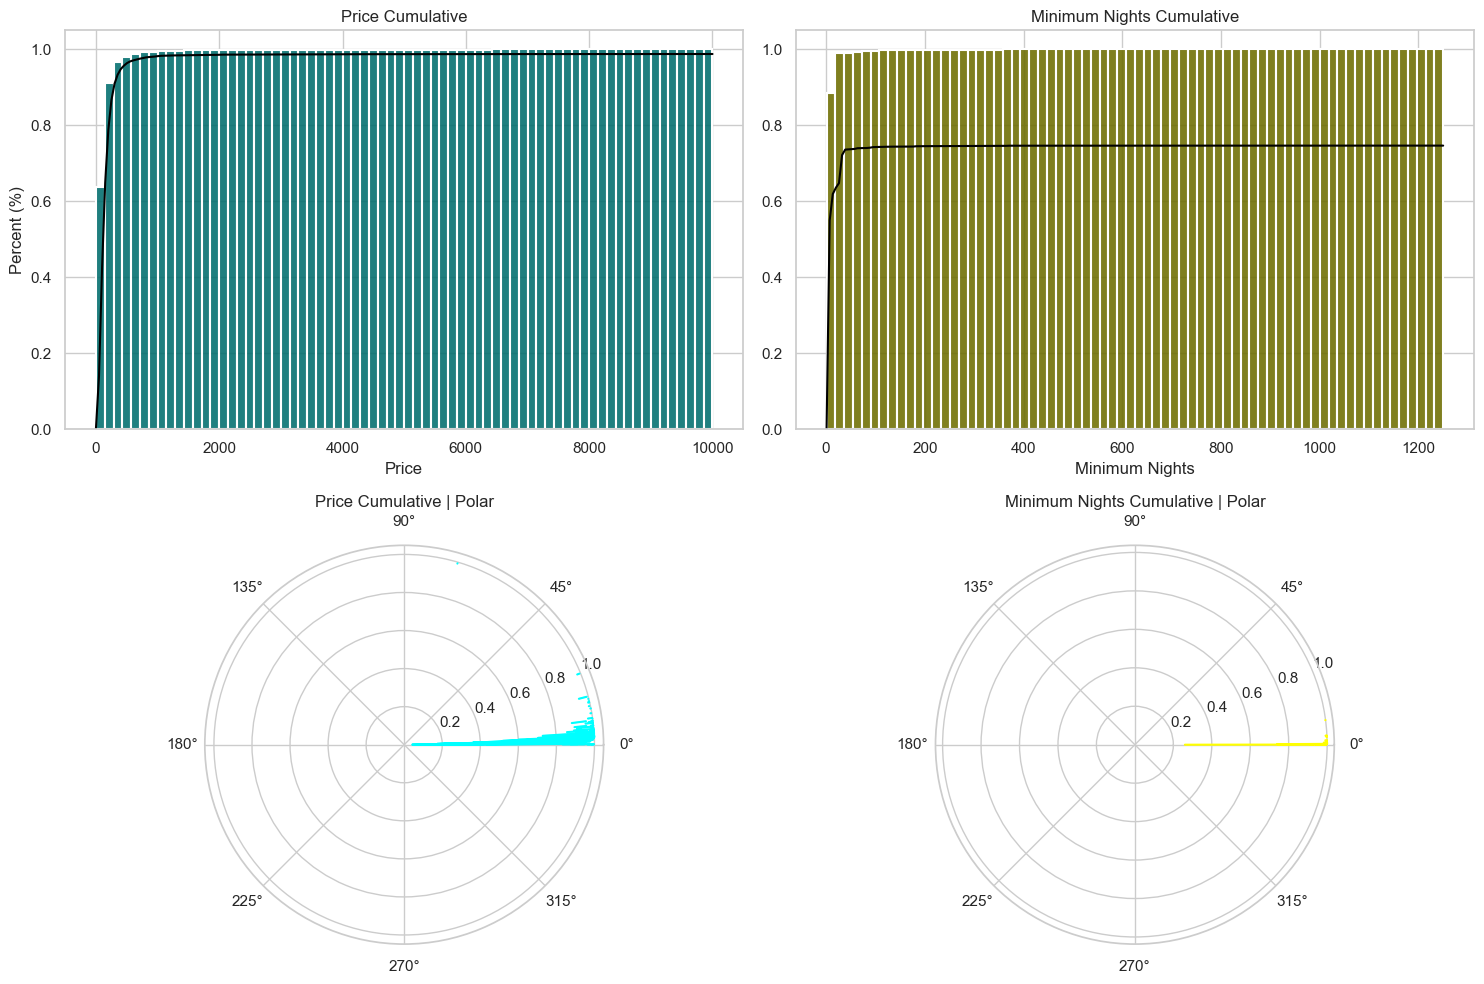

In [27]:
# Calculate cumulative percentage for Price
dados['price_cumulative'] = np.cumsum(dados['price'].value_counts(normalize=True))
# Plot Price Cumulative
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(dados, x='price', cumulative=True, stat='density', bins=70, color='cyan', linewidth=0.5, edgecolor='black')
sns.histplot(dados, x='price', cumulative=True, stat='density', bins=70, color='black', linewidth=1.5, kde=True, legend=False)
plt.xlabel("Price")
plt.ylabel("Percent (%)")
plt.title("Price Cumulative")
plt.grid(True)

# Calculate cumulative percentage for Minimum Nights
dados['minimum_nights_cumulative'] = np.cumsum(dados['minimum_nights'].value_counts(normalize=True))
# Plot Minimum Nights Cumulative
plt.subplot(2, 2, 2)
sns.histplot(dados, x='minimum_nights', cumulative=True, stat='density', bins=70, color='yellow', linewidth=0.5, edgecolor='black')
sns.histplot(dados, x='minimum_nights', cumulative=True, stat='density', bins=70, color='black', linewidth=1.5, kde=True, legend=False)
plt.xlabel("Minimum Nights")
plt.ylabel("")
plt.title("Minimum Nights Cumulative")
plt.grid(True)

# Plot Price Cumulative Polar
plt.subplot(2, 2, 3, polar=True)
theta = np.linspace(0, 2 * np.pi, len(dados['price_cumulative']))
plt.plot(theta, dados['price_cumulative'], color='cyan')
plt.fill(theta, dados['price_cumulative'], color='cyan', alpha=0.5)
plt.title("Price Cumulative | Polar")
plt.grid(True)

# Plot Minimum Nights Cumulative Polar
plt.subplot(2, 2, 4, polar=True)
theta = np.linspace(0, 2 * np.pi, len(dados['minimum_nights_cumulative']))
plt.plot(theta, dados['minimum_nights_cumulative'], color='yellow')
plt.fill(theta, dados['minimum_nights_cumulative'], color='yellow', alpha=0.5)
plt.title("Minimum Nights Cumulative | Polar")
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [28]:
# Calculate Mean Absolute Deviation (MAD)
def mean_absolute_deviation(data):
    mean = np.mean(data)
    deviations = np.abs(data - mean)
    return np.mean(deviations)

# Calculate MAD for 'price' and 'minimum_nights' columns
mad_price = mean_absolute_deviation(dados['price'])
mad_minimum_nights = mean_absolute_deviation(dados['minimum_nights'])

# Create DataFrame
md = pd.DataFrame({'DM': [mad_price, mad_minimum_nights]}, index=['Price', 'Minimum nights'])
md.index.name = None  # Remove the index name

# Display the DataFrame
print(md)

                       DM
Price           92.451044
Minimum nights   7.557840


In [29]:
# Calculate variance
var_price = np.var(dados['price'])
var_minimum_nights = np.var(dados['minimum_nights'])

# Create DataFrame
v = pd.DataFrame({'Variance': [var_price, var_minimum_nights]}, index=['Price', 'Minimum nights'])

# Display the DataFrame
print(v)

                    Variance
Price           57672.845698
Minimum nights    420.674038


In [30]:
# Calculate standard deviation
std_price = np.sqrt(np.var(dados['price']))
std_minimum_nights = np.sqrt(np.var(dados['minimum_nights']))

# Create DataFrame
std = pd.DataFrame({'Standard deviation': [std_price, std_minimum_nights]}, index=['Price', 'Minimum nights'])

# Display the DataFrame
print(std)

                Standard deviation
Price                   240.151714
Minimum nights           20.510340


In [31]:
# Calculate mean price for each room type
mean_room_type = dados.groupby('room_type')['price'].mean().reset_index()

# Calculate the percentage
mean_room_type['Percent'] = mean_room_type['price'] / mean_room_type['price'].sum() * 100

# Rename columns
mean_room_type.columns = ['room_type', 'average_price', 'Percent']

# Display the result
print(mean_room_type)

         room_type  average_price    Percent
0  Entire home/apt     211.794246  56.979459
1     Private room      89.780973  24.153967
2      Shared room      70.127586  18.866574


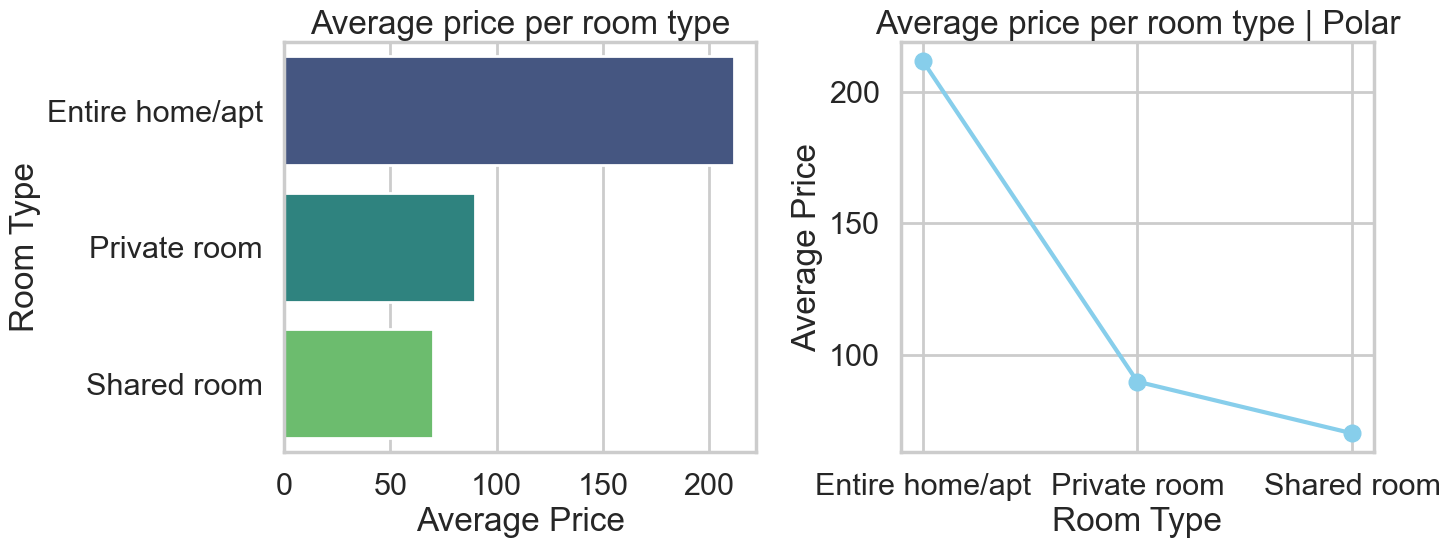

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean price per room type
mean_room_type = dados.groupby('room_type')['price'].mean().reset_index()
mean_room_type.columns = ['room_type', 'average_price']

# Set up themes
sns.set_theme(style="whitegrid")
sns.set_context("poster")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Average price per room type
sns.barplot(data=mean_room_type, x='average_price', y='room_type', palette='viridis', ax=axs[0])
axs[0].set_xlabel('Average Price')
axs[0].set_ylabel('Room Type')
axs[0].set_title('Average price per room type')

# Plot 2: Average price per room type - Polar
theta = np.linspace(0, 2 * np.pi, len(mean_room_type))
r = mean_room_type['average_price']
axs[1].plot(theta, r, marker='o', color='skyblue')
axs[1].set_title('Average price per room type | Polar')
axs[1].set_xticks(theta)
axs[1].set_xticklabels(mean_room_type['room_type'])
axs[1].set_xlabel('Room Type')
axs[1].set_ylabel('Average Price')

# Show the plot
plt.tight_layout()
plt.show()

We can conclude that the Entire home / apt type has an average price for reservations around 211.79 dollars , which represents 56.97 % of all types of rooms . We have the Entire home / apt has an average price of 32.82% more expensive than the Private room and 38.11% more expensive than the Shared room .

Secondly, we have Private room which has an average booking price of around 89.78 dollar, which represents 24.15% of all types of rooms . We have that the Private room has an average price 32.82% less than Entire home / apt and 5.29% larger than the Shared room.

And lastly, Shared room which has an average booking price of around 70.12 dollars , which represents 18.86% of all types of rooms . We have that the Shared room has an average price 38.1% less than Entire home / apt and 5.29% smaller than the Private room.

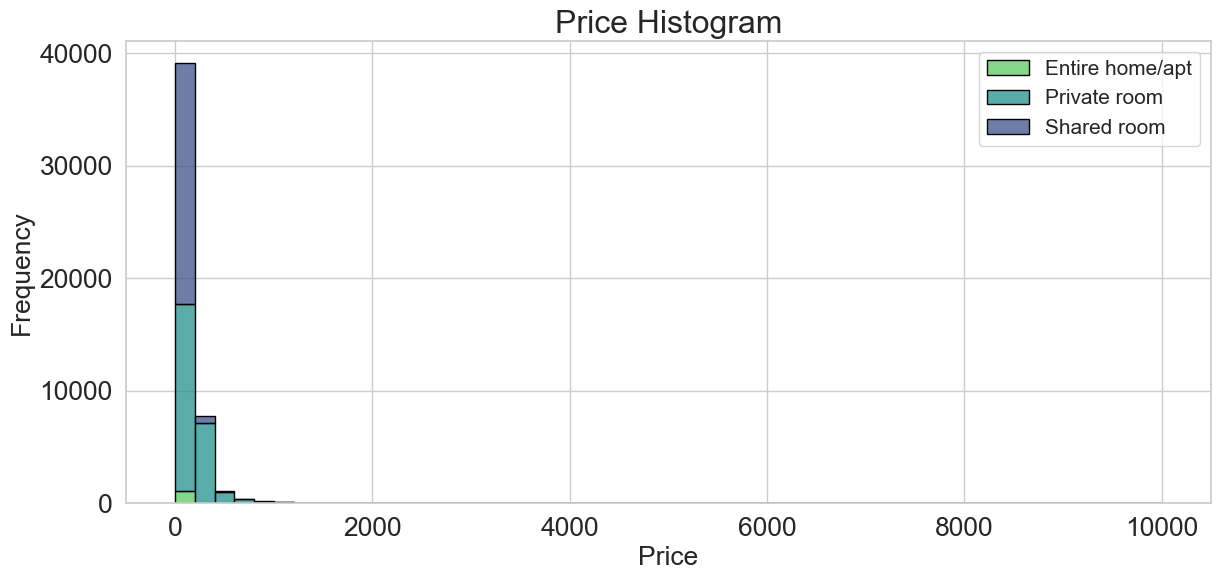

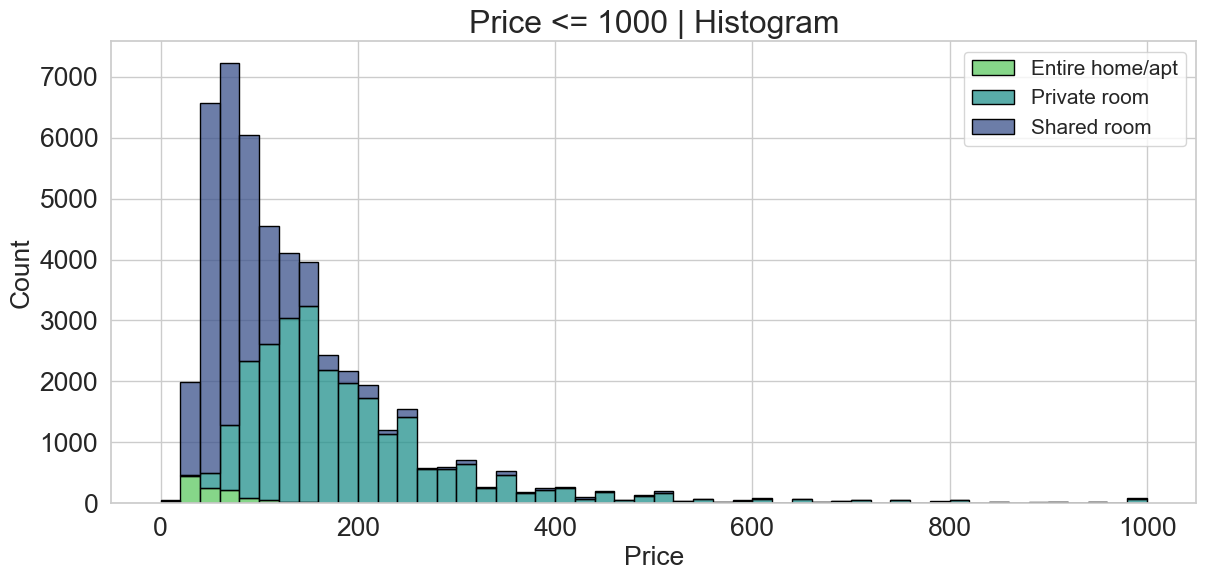

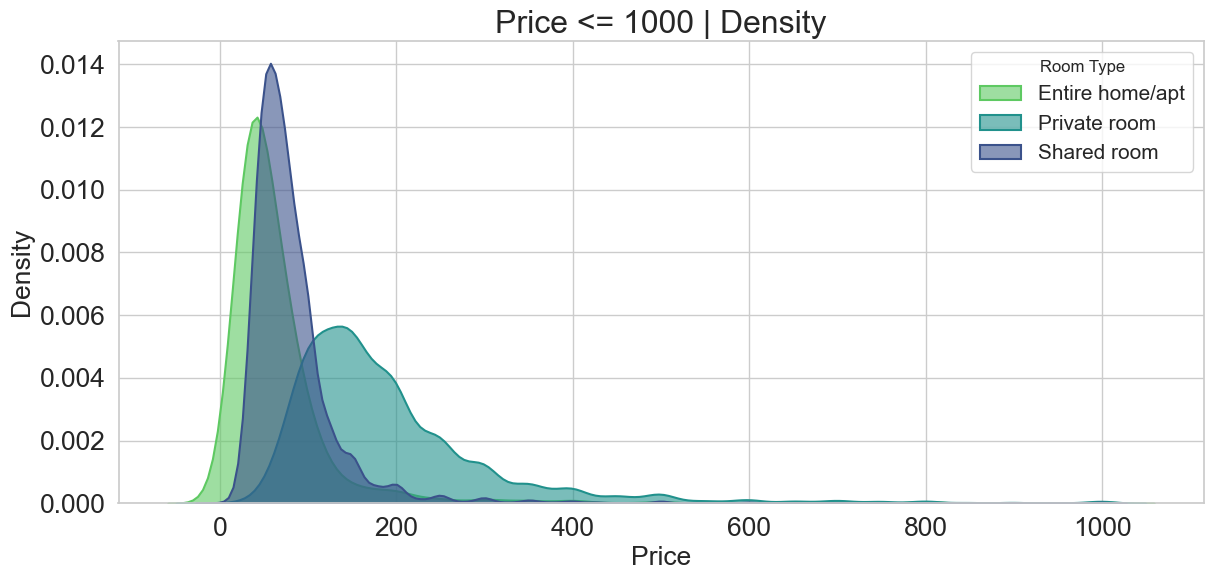

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Original themes
tema = {'axes.labelsize': 19,
        'axes.titlesize': 23,
        'legend.fontsize': 19,
        'xtick.labelsize': 19,
        'ytick.labelsize': 19}

tema1 = {'axes.labelsize': 19,
         'axes.titlesize': 23,
         'xtick.labelsize': 19,
         'ytick.labelsize': 19}

# Set custom style
sns.set_theme(style="whitegrid", rc=tema)

# Plot 1: Price Histogram
plt.figure(figsize=(14, 6))
sns.histplot(data=dados, x='price', hue='room_type', bins=50, multiple='stack', palette='viridis', edgecolor='black', legend=False)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.legend(['Entire home/apt', 'Private room', 'Shared room'], fontsize=15)
plt.show()

# Plot 2: Price <= 1000 | Histogram
plt.figure(figsize=(14, 6))
sns.histplot(data=dados[dados['price'] <= 1000], x='price', hue='room_type', bins=50, multiple='stack', palette='viridis', edgecolor='black', legend=False)
plt.xlabel('Price')
plt.title('Price <= 1000 | Histogram')
plt.legend(['Entire home/apt', 'Private room', 'Shared room'], fontsize=15)
plt.show()

# Plot 3: Price <= 1000 | Density
plt.figure(figsize=(14, 6))
sns.kdeplot(data=dados[dados['price'] <= 1000], x='price', hue='room_type', fill=True, common_norm=False, palette='viridis', alpha=0.6, linewidth=1.5)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price <= 1000 | Density')
plt.legend(title='Room Type', labels=['Entire home/apt', 'Private room', 'Shared room'], fontsize=15)
plt.show()


In [34]:
import pandas as pd

# Calculate average price per neighbourhood
top_10_neighbourhood = dados.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by average price and select top 10
top_10_neighbourhood = top_10_neighbourhood.sort_values(by='price', ascending=False).head(10)

# Rename columns
top_10_neighbourhood.columns = ['fct', 'dbl']

# Reset index and reverse order
top_10_neighbourhood.index = range(10, 0, -1)

# Display results
print(top_10_neighbourhood)


                  fct         dbl
10     Fort Wadsworth  800.000000
9             Woodrow  700.000000
8             Tribeca  490.638418
7            Sea Gate  487.857143
6           Riverdale  442.090909
5        Prince's Bay  409.500000
4   Battery Park City  367.557143
3   Flatiron District  341.925000
2       Randall Manor  336.000000
1                NoHo  295.717949


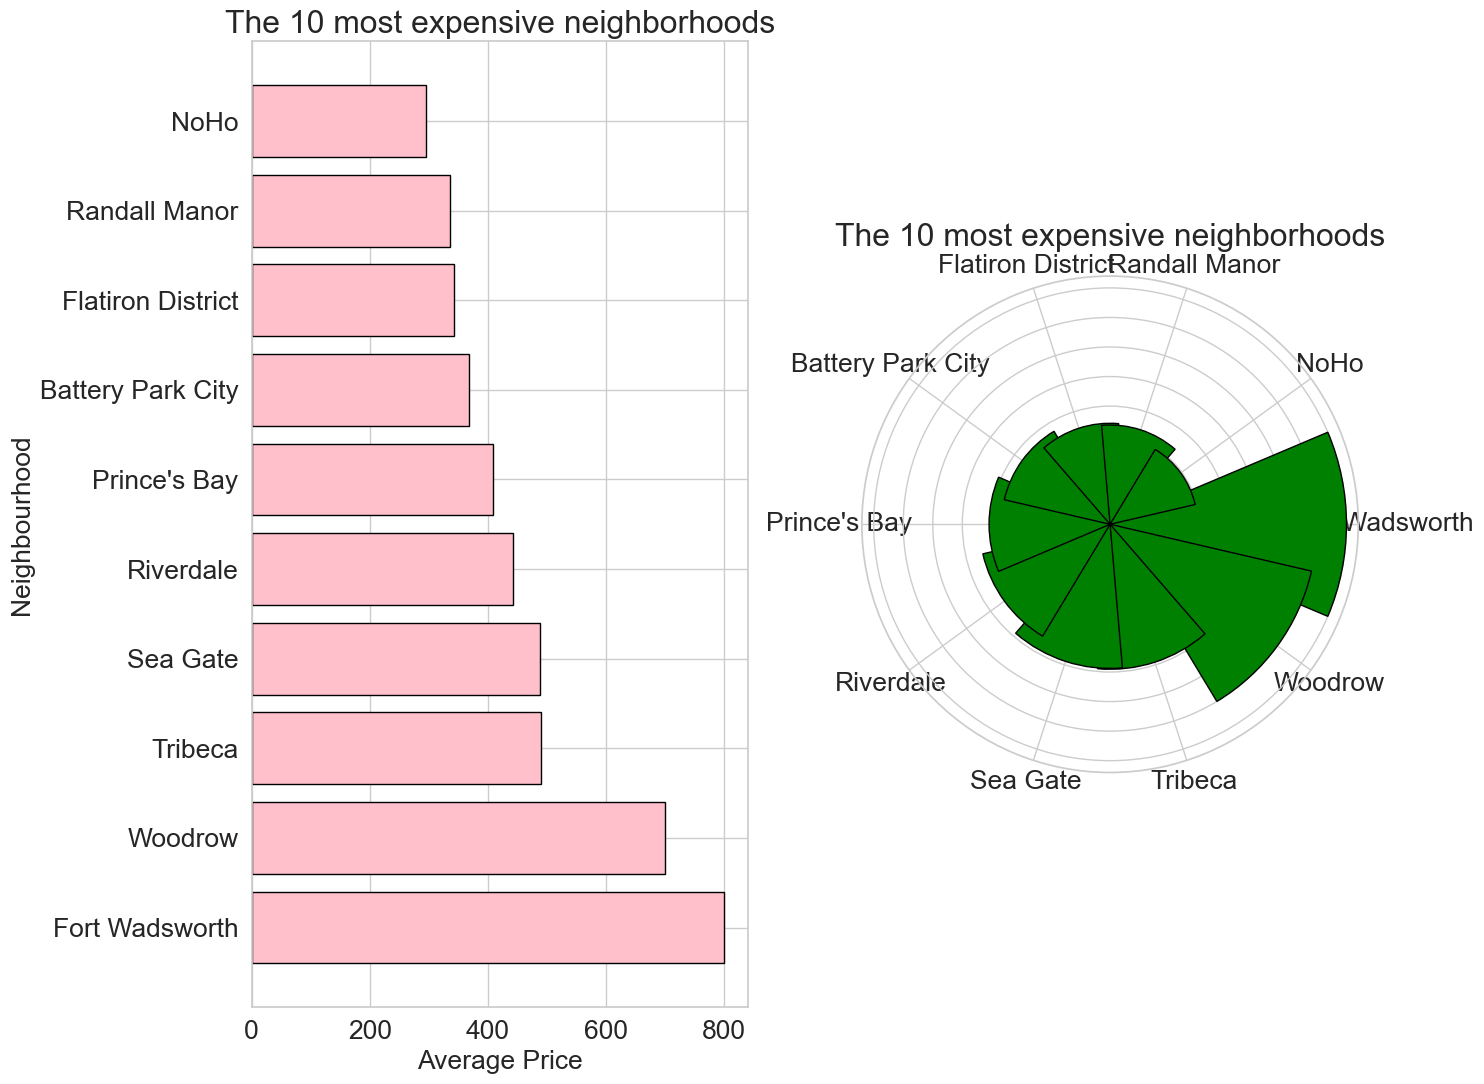

In [35]:
# Set the data
neighbourhoods = top_10_neighbourhood['fct']
average_prices = top_10_neighbourhood['dbl']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 11))

# Plot 1: Bar plot
axs[0].barh(neighbourhoods, average_prices, color='pink', edgecolor='black')
axs[0].set_title('The 10 most expensive neighborhoods')
axs[0].set_xlabel('Average Price')
axs[0].set_ylabel('Neighbourhood')

# Plot 2: Polar plot
theta = np.linspace(0, 2 * np.pi, len(neighbourhoods), endpoint=False)
axs[1] = plt.subplot(1, 2, 2, projection='polar')
bars = axs[1].bar(theta, average_prices, color='green', edgecolor='black')
axs[1].set_title('The 10 most expensive neighborhoods')
axs[1].set_yticklabels([])
axs[1].set_xticks(theta)
axs[1].set_xticklabels(neighbourhoods)
axs[1].set_theta_direction(-1)

plt.tight_layout()
plt.show()


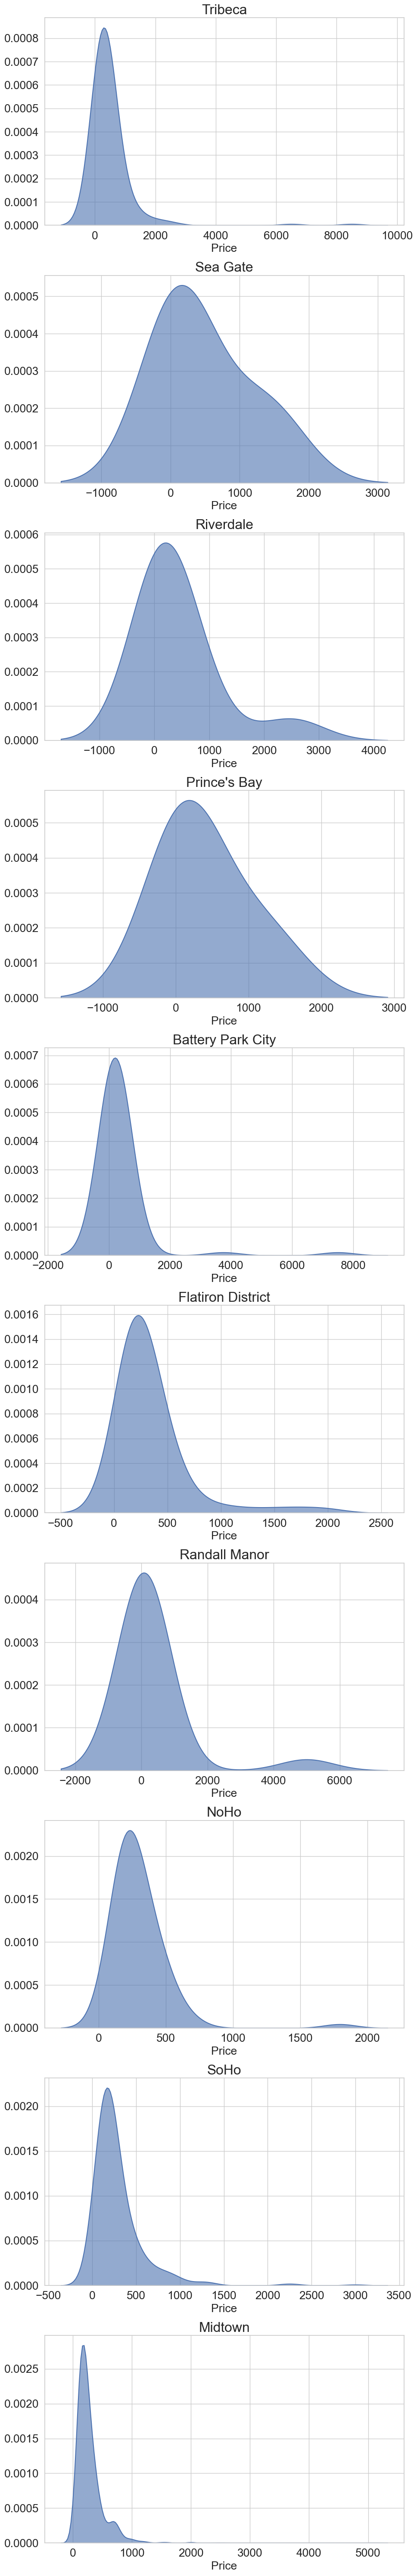

In [36]:
# Define the neighborhoods of interest
neighbourhoods = ["Tribeca", "Sea Gate", "Riverdale", "Prince's Bay", "Battery Park City",
                  "Flatiron District", "Randall Manor", "NoHo", "SoHo", "Midtown"]

# Create a figure with subplots for each neighborhood
fig, axes = plt.subplots(nrows=len(neighbourhoods), figsize=(10, 6*len(neighbourhoods)))

# Plot each neighborhood
for i, neighbourhood in enumerate(neighbourhoods):
    # Filter the data for the current neighborhood
    df_neighbourhood = dados[dados['neighbourhood'] == neighbourhood]
    
    # Plot the density ridgeline plot for the current neighborhood
    sns.kdeplot(data=df_neighbourhood, x='price', fill=True, alpha=0.6, linewidth=1.5, bw_adjust=1.3, ax=axes[i])
    
    # Set plot title
    axes[i].set_title(neighbourhood)
    
    # Set x-axis label
    axes[i].set_xlabel('Price')
    
    # Remove y-axis label
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


Viewing the graph above we can see that the Sea Gate neighborhood does not show any density behavior, due to the fact that it probably only appears once or very few times in the data set. This also happened with two other neighborhoods whose names are: Fort Wadsworth with a value of 800.00 dollars and Woodrow with 700.00 dollars, these two neighborhoods have been removed from the chart above.

ValueError: num must be 1 <= num <= 12, not 13

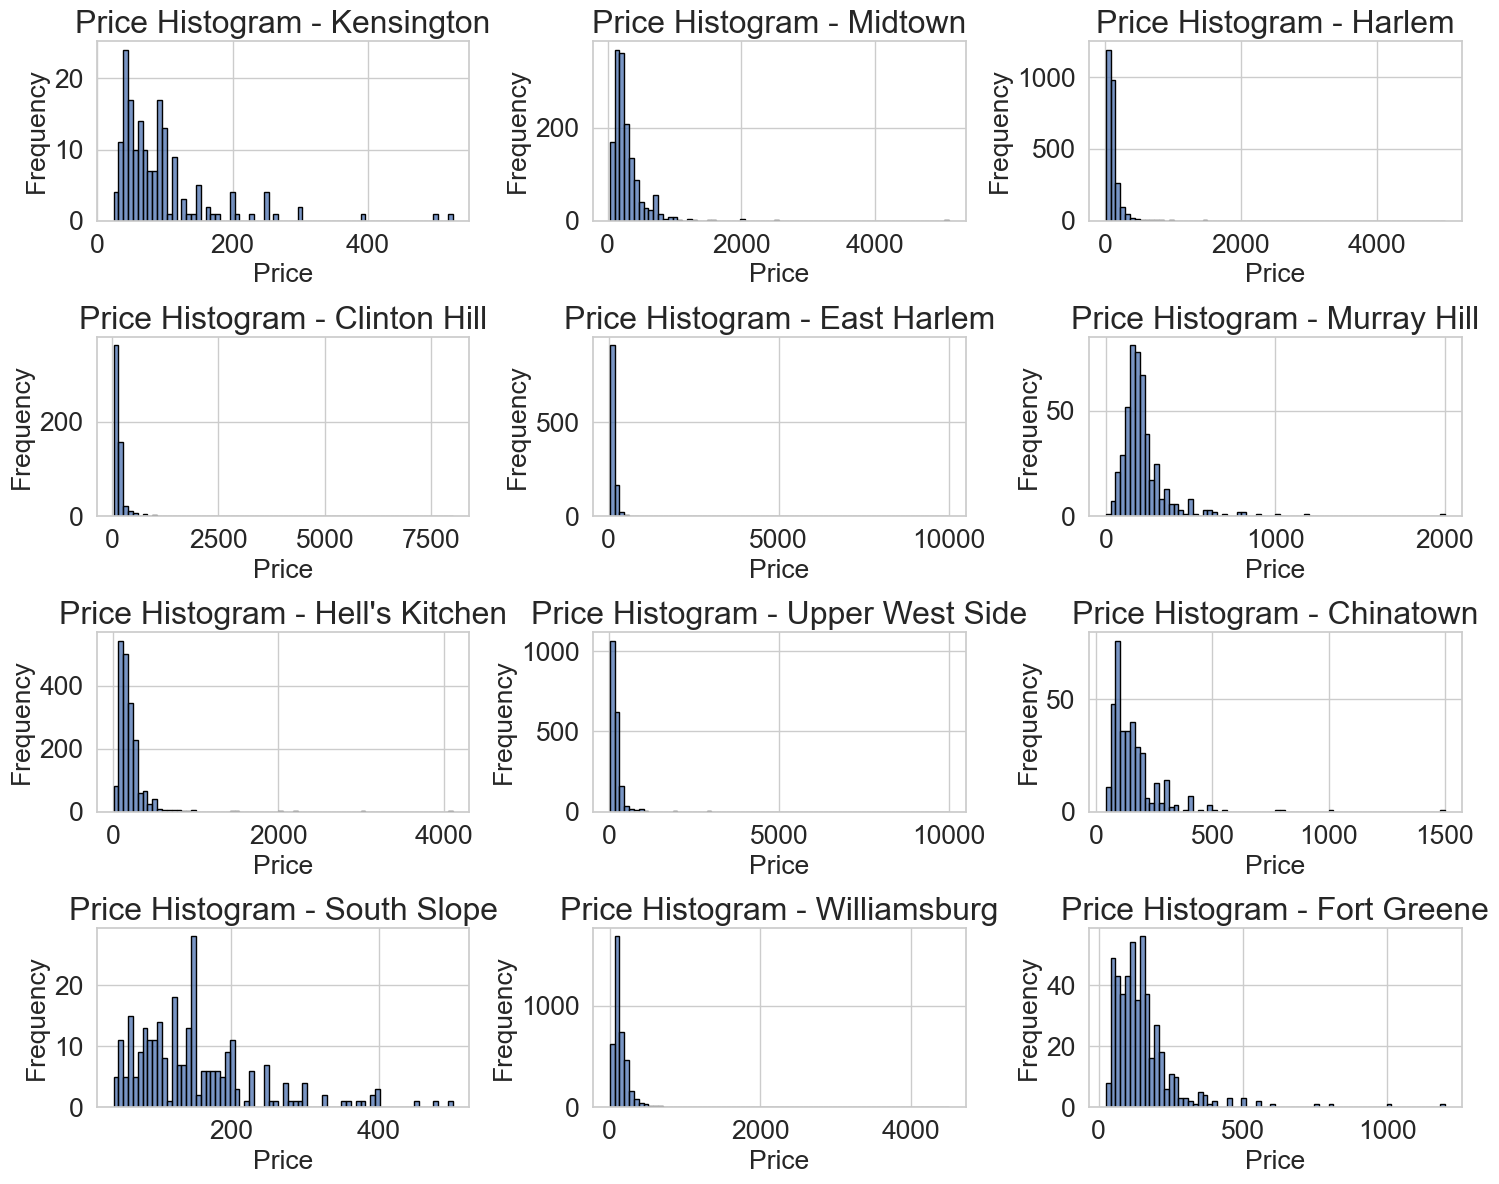

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the theme
tema = {
    'axes.labelsize': 19,
    'axes.titlesize': 23,
    'xtick.labelsize': 19,
    'ytick.labelsize': 19,
    'legend.fontsize': 14,
    'axes.linewidth': 1.5,
    'axes.titlepad': 20,
}

# Define the figure size
plt.figure(figsize=(15, 12))

# Plot histogram for each neighborhood separately
for neighborhood in df['neighbourhood'].unique():
    plt.subplot(4, 3, df['neighbourhood'].unique().tolist().index(neighborhood) + 1)
    sns.histplot(data=df[df['neighbourhood'] == neighborhood], x='price', bins=70, element='bars', palette='colorblind', edgecolor='black', linewidth=1)
    plt.ylabel('Frequency')
    plt.xlabel('Price')
    plt.title(f'Price Histogram - {neighborhood}')
    plt.tight_layout()

# Apply the theme
sns.set_theme(style="whitegrid", rc=tema)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with the top 10 neighborhoods and their average price
top_10_neighbourhood_b = dados.groupby('neighbourhood')['price'].mean().sort_values().head(10).reset_index()

# Rename columns
top_10_neighbourhood_b.columns = ['neighbourhood', 'Average_price_per_neighborhood']

# Add a rank column
top_10_neighbourhood_b['Rank'] = range(1, 11)

# Set the neighborhood as index
top_10_neighbourhood_b.set_index('Rank', inplace=True)

# Display the DataFrame
print(top_10_neighbourhood_b)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_neighbourhood_b, x='Average_price_per_neighborhood', y='neighbourhood', palette='viridis')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Average Price')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the theme
tema = {'axes.titlepad': 20,
         'axes.labelsize': 19,
         'axes.titlesize': 23,
         'legend.fontsize': 19,
         'legend.title_fontsize': None}  # Remove legend title

# Set the theme
sns.set_theme(rc=tema)

# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dados, x='latitude', y='longitude', hue='price', palette='viridis', size=5)
plt.title('')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


As our database prices are mostly below 73,470 dollars, we will filter the data to obtain only bookings below 100 dollars, helps to understand how this grouping behaves in relation to the coordinate.

In [ ]:
# Filter the data
df = dados[dados['price'] <= 100]
df = df[['latitude', 'longitude', 'price']]

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(df['latitude'], df['longitude'], c=df['price'], cmap='viridis', s=50)
plt.colorbar(label='Price')
plt.title('Price <= 100 dollars')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data
df = dados[dados['price'] <= 100]
df = df[['latitude', 'longitude', 'price', 'neighbourhood_group']]

# Encode neighbourhood_group as numerical values
df['neighbourhood_group_code'] = df['neighbourhood_group'].astype('category').cat.codes

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(17, 14))

# Plot for neighbourhood_group
axs[0, 0].scatter(df['latitude'], df['longitude'], c=df['neighbourhood_group_code'], cmap='viridis', s=50)
axs[0, 0].set_title('Neighbourhood Group')
axs[0, 0].set_xlabel('Latitude')
axs[0, 0].set_ylabel('Longitude')

# Plot for price
axs[0, 1].scatter(df['latitude'], df['longitude'], c=df['price'], cmap='viridis', s=50)
axs[0, 1].set_title('Price')
axs[0, 1].set_xlabel('Latitude')
axs[0, 1].set_ylabel('Longitude')

# Plot for neighbourhood_group with polar coordinates
axs[1, 0].scatter(df['latitude'], df['longitude'], c=df['neighbourhood_group_code'], cmap='viridis', s=50)
axs[1, 0].set_title('Neighbourhood Group (Polar)')
axs[1, 0].set_xlabel('Latitude')
axs[1, 0].set_ylabel('Longitude')

# Plot for price with polar coordinates
axs[1, 1].scatter(df['latitude'], df['longitude'], c=df['price'], cmap='viridis', s=50)
axs[1, 1].set_title('Price (Polar)')
axs[1, 1].set_xlabel('Latitude')
axs[1, 1].set_ylabel('Longitude')

plt.tight_layout()
plt.show()
